# Store Sales - Time Series Forecasting

Predicts the unit sales for thousands of items sold at different Favorita stores.

## Loading Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import copy

## Loading Data

In [2]:
data=pd.read_csv('Superstore.csv',index_col="Order ID")
data.head(3)

,Row ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order ID,,,,,,,,,,,,,,,,,,,,
CA-2016-152156,1,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
CA-2016-152156,2,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
CA-2016-138688,3,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [3]:
data.shape

(9994, 20)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, CA-2016-152156 to CA-2017-119914
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int

Seems like no null values found in the given dataset


In [5]:
data.corr()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.009671,-0.001359,-0.004016,0.013480,0.012497
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.001359,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,-0.004016,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.013480,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,0.012497,-0.029961,0.479064,0.066253,-0.219487,1.000000


<AxesSubplot:>

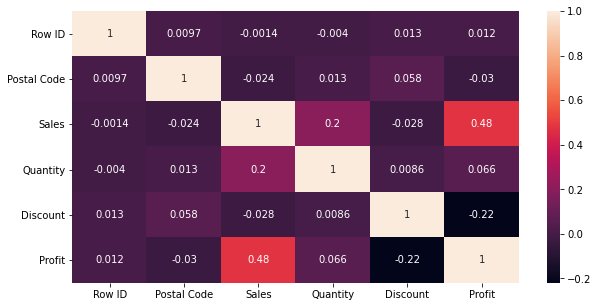

In [6]:
plt.figure(figsize=(10,5))
sns.heatmap(data=data.corr(),annot=True)

In [7]:
#parsing dates
data["Order Date"]=pd.to_datetime(data["Order Date"])
data["Ship Date"]=pd.to_datetime(data["Ship Date"])


### Insight 1:  Yearly Profit

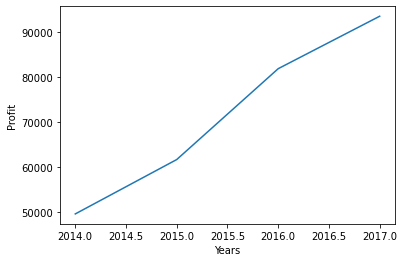

In [8]:
yearlyprofit = data.groupby(data["Order Date"].dt.year)["Profit"].sum()
plt.plot(yearlyprofit)

plt.xlabel('Years')
plt.ylabel('Profit')
plt.show()


### Insight 2:  Monthly Profit of given year

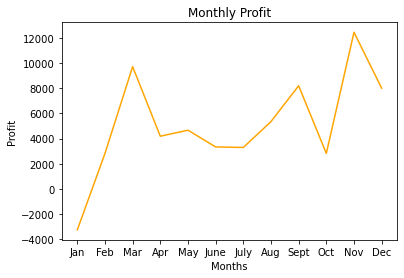

In [9]:
d2 = data.copy()
yearlyData = d2[d2["Order Date"].dt.year == 2015]
monthlyProfit = yearlyData.groupby(yearlyData["Order Date"].dt.month)["Profit"].sum()
months = ["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]
plt.plot(months,monthlyProfit,color="orange")
plt.xlabel('Months')
plt.ylabel('Profit')
plt.title("Monthly Profit")
plt.show()



### Insight 3 : Yearly SALES

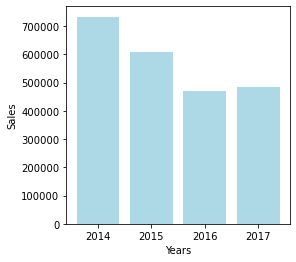

In [10]:
a=data["Order Date"].dt.year.value_counts().index
b=data.groupby(data["Order Date"].dt.year)["Sales"].sum()
#plt.bar(b,list(a))
plt.figure(figsize=(4,4))
plt.bar(a,b,color='lightblue')
plt.xlabel("Years")
plt.ylabel("Sales")
plt.show()

### Insight 4 : Top Sold Product

In [11]:
productSales = data.groupby(["Product ID","Product Name"])["Sales"].sum()
productSales= pd.DataFrame(productSales)
TopSoldProducts = productSales.sort_values(by=["Sales"],ascending=False).head()
TopSoldProducts

,,Sales
Product ID,Product Name,
TEC-CO-10004722,Canon imageCLASS 2200 Advanced Copier,61599.824
OFF-BI-10003527,Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384
TEC-MA-10002412,Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
FUR-CH-10002024,HON 5400 Series Task Chairs for Big and Tall,21870.576
OFF-BI-10001359,GBC DocuBind TL300 Electric Binding System,19823.479


### Insight 5 : Least sold product

In [12]:
LeastSold = productSales.sort_values(by=["Sales"],ascending=True).head()
LeastSold

,,Sales
Product ID,Product Name,
OFF-AP-10002203,Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac,1.624
OFF-LA-10003388,Avery 5,5.760
OFF-PA-10000048,Xerox 20,6.480
OFF-EN-10001535,Grip Seal Envelopes,7.072
OFF-AR-10003986,Avery Hi-Liter Pen Style Six-Color Fluorescent Set,7.700


### Insight 6 : Sales per State

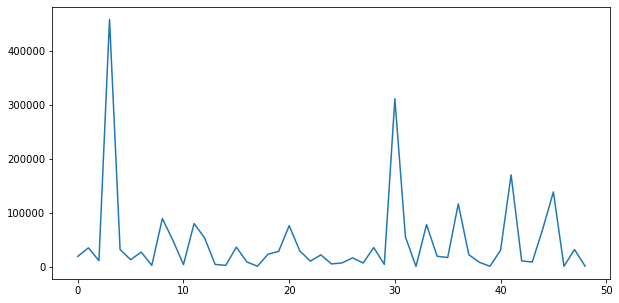

State
Alabama                  19510.6400
Arizona                  35282.0010
Arkansas                 11678.1300
California              457687.6315
Colorado                 32108.1180
Connecticut              13384.3570
Delaware                 27451.0690
District of Columbia      2865.0200
Florida                  89473.7080
Georgia                  49095.8400
Idaho                     4382.4860
Illinois                 80166.1010
Indiana                  53555.3600
Iowa                      4579.7600
Kansas                    2914.3100
Kentucky                 36591.7500
Louisiana                 9217.0300
Maine                     1270.5300
Maryland                 23705.5230
Massachusetts            28634.4340
Michigan                 76269.6140
Minnesota                29863.1500
Mississippi              10771.3400
Missouri                 22205.1500
Montana                   5589.3520
Nebraska                  7464.9300
Nevada                   16729.1020
New Hampshire         

In [13]:
# sales per state
plt.figure(figsize=(10,5))
plt.plot(list(x for x in range(49)),data.groupby("State")["Sales"].sum())
plt.show()
data.groupby("State")["Sales"].sum()


In [14]:
#percentage of profit with over all sale

round((data["Profit"].sum()/data["Sales"].sum())*100,2)


12.47

### Insight 7 : Sales Per State - Postal Code ( Store )

In [15]:
states = data["State"].unique()


In [16]:
def plotperstate(variable):
    print(f"\n\n{variable.upper()}")
    f=data.loc[(data["State"] == variable)]
    n = f.groupby("Postal Code")["Sales"].sum()
    plt.figure(figsize=(15,5))
    plt.plot(n.index.astype(str),n)
    plt.show()
    plt.xlabel('Postal Codes')
    plt.ylabel('Sales')
    print(n)
    



KENTUCKY


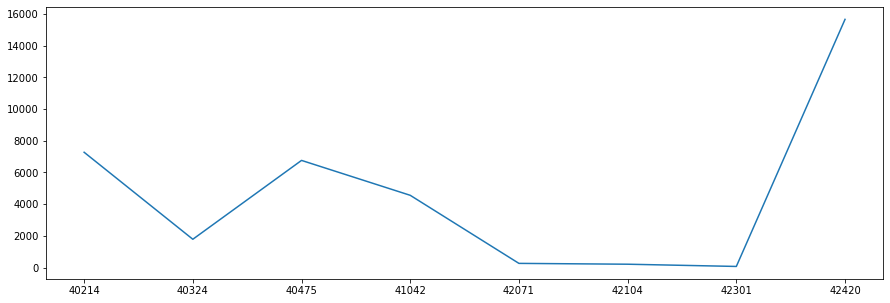

Postal Code
40214     7275.39
40324     1786.42
40475     6761.52
41042     4559.80
42071      264.62
42104      211.81
42301       71.18
42420    15661.01
Name: Sales, dtype: float64


CALIFORNIA


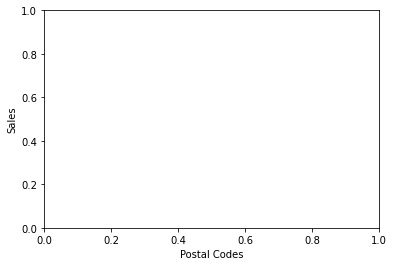

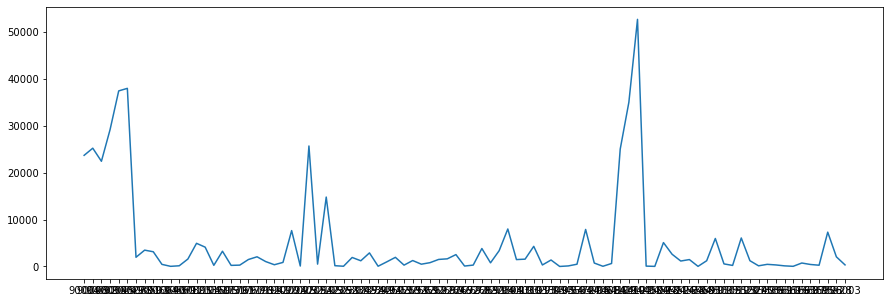

Postal Code
90004    23684.2590
90008    25208.0435
90032    22420.4085
90036    29157.8530
90045    37419.7650
            ...    
95687      423.2800
95695      264.6620
95823     7311.2780
95928     2050.1780
96003      333.5760
Name: Sales, Length: 89, dtype: float64


FLORIDA


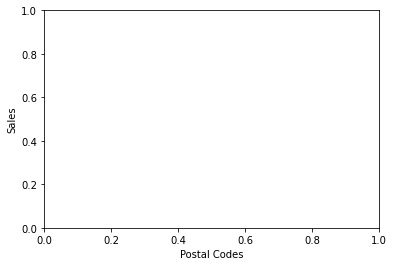

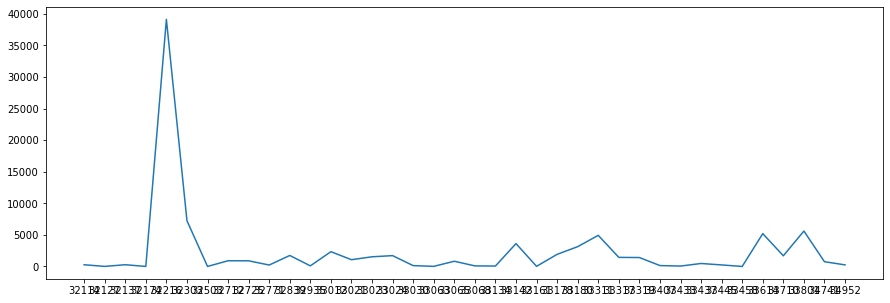

Postal Code
32114      272.3315
32127        7.8240
32137      274.4280
32174        2.8080
32216    39133.3280
32303     7250.6690
32503        2.2140
32712      904.5540
32725      893.2400
32771      225.5460
32839     1740.0800
32935       95.6160
33012     2338.9490
33021     1070.4740
33023     1531.1920
33024     1714.3755
33030      132.5520
33063       15.5520
33065      824.9920
33068       90.4400
33134       64.2480
33142     3619.4210
33161       22.1280
33178     1918.3685
33180     3135.2850
33311     4929.5325
33317     1436.8360
33319     1413.5100
33407      141.3280
33433       63.0080
33437      469.5850
33445      242.5360
33458        2.0640
33614     5196.0805
33710     1690.7920
33801     5606.8865
34741      751.9840
34952      248.9500
Name: Sales, dtype: float64


NORTH CAROLINA


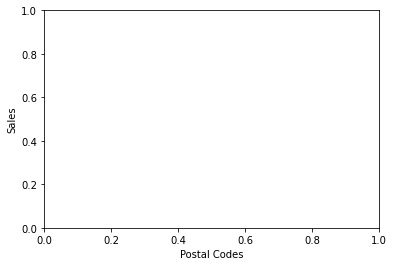

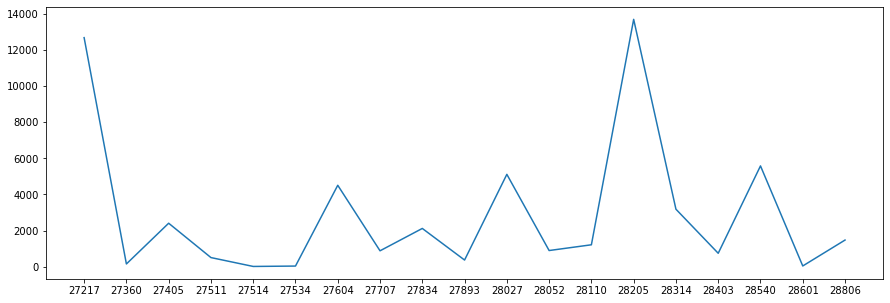

Postal Code
27217    12681.282
27360      151.292
27405     2406.780
27511      505.208
27514       14.016
27534       34.944
27604     4507.540
27707      879.960
27834     2117.830
27893      368.732
28027     5111.844
28052      895.060
28110     1213.064
28205    13693.339
28314     3183.116
28403      743.162
28540     5579.855
28601       40.764
28806     1475.376
Name: Sales, dtype: float64


WASHINGTON


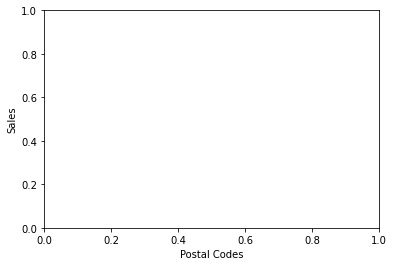

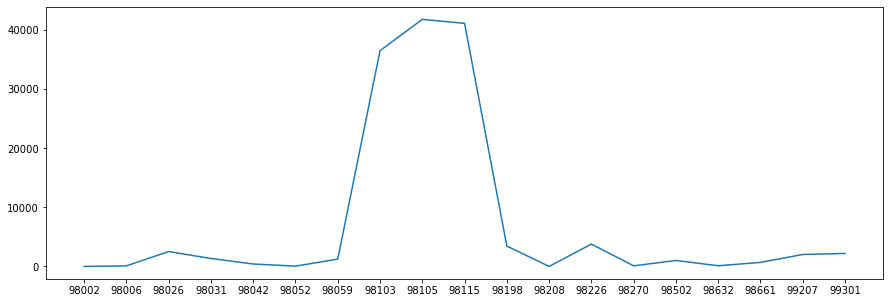

Postal Code
98002        4.180
98006      103.622
98026     2523.692
98031     1351.254
98042      413.680
98052       55.230
98059     1242.632
98103    36541.826
98105    41838.008
98115    41160.908
98198     3454.438
98208        3.856
98226     3790.240
98270      102.180
98502     1020.448
98632      119.210
98661      686.836
99207     2027.918
99301     2201.112
Name: Sales, dtype: float64


TEXAS


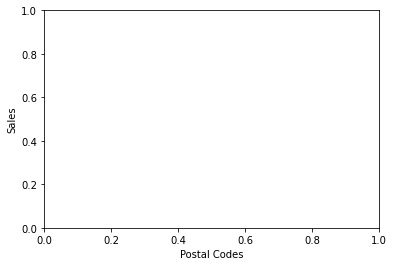

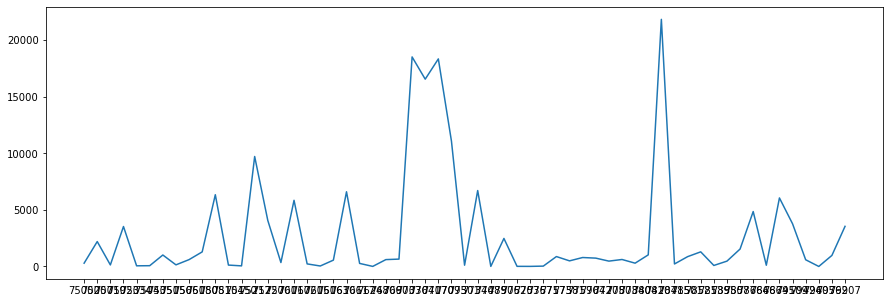

Postal Code
75002      290.2060
75007     2200.6460
75019      135.9360
75023     3530.3746
75034       57.5040
75043       67.7040
75051     1012.4860
75056      142.1600
75061      605.5000
75080     1288.4640
75081     6341.1428
75104      122.3760
75150       52.1480
75217     9720.6520
75220     4070.1374
75701      347.2060
76017     5847.7720
76021      226.2560
76051       41.5280
76063      558.8770
76106     6602.7064
76117      269.3280
76248        6.0000
76706      606.1072
76903      650.6360
77036    18522.7876
77041    16556.9592
77070    18347.5944
77095    11077.4192
77301      111.6720
77340     6710.6168
77489        6.3700
77506     2477.4580
77520       10.3680
77536        6.9240
77571       30.3920
77573      875.3680
77581      494.9960
77590      790.9720
77642      737.0528
77705      472.1160
77803      616.6560
77840      291.0420
78041     1024.3400
78207    21843.5280
78415      220.5440
78501      866.7160
78521     1292.2268
78539       88.2760
78550   

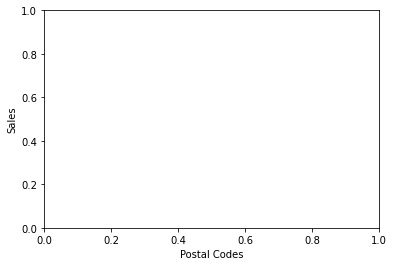

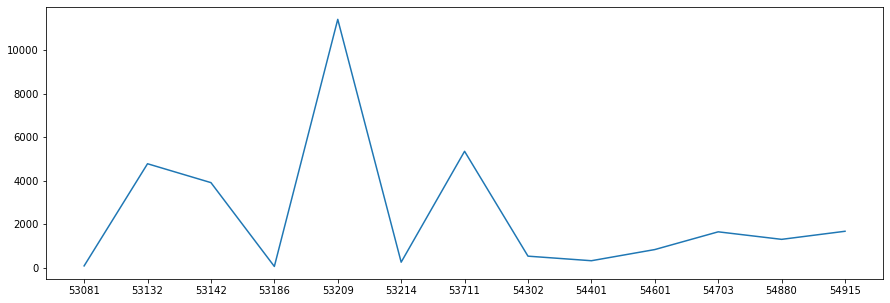

Postal Code
53081       79.74
53132     4774.25
53142     3906.73
53186       54.50
53209    11410.22
53214      250.48
53711     5346.79
54302      527.32
54401      317.48
54601      830.41
54703     1645.65
54880     1299.73
54915     1671.31
Name: Sales, dtype: float64


UTAH


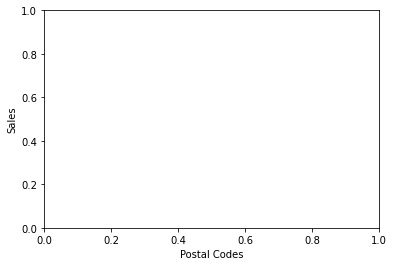

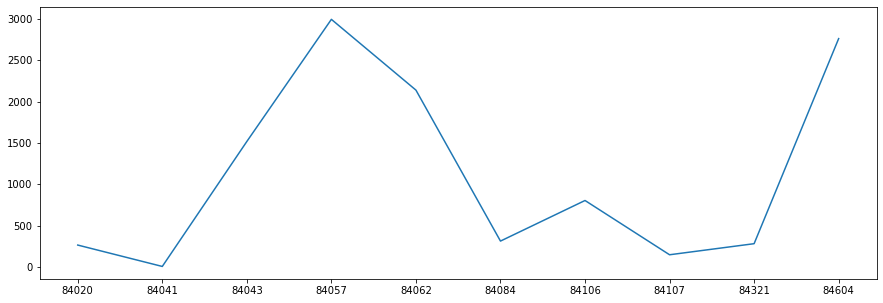

Postal Code
84020     263.650
84041       4.960
84043    1516.726
84057    2994.088
84062    2138.178
84084     311.850
84106     802.776
84107     146.318
84321     280.276
84604    2761.234
Name: Sales, dtype: float64


NEBRASKA


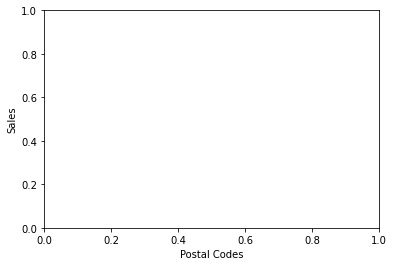

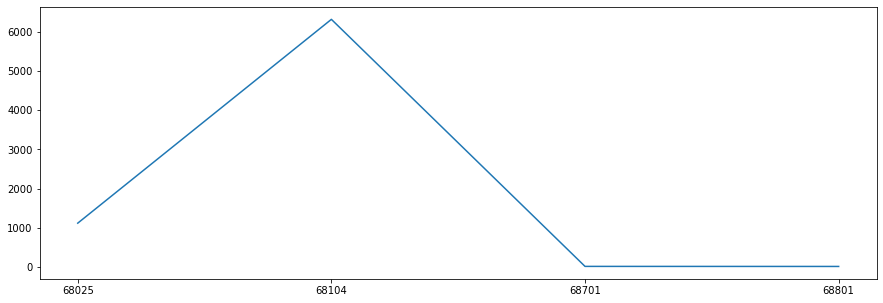

Postal Code
68025    1119.01
68104    6312.53
68701      17.43
68801      15.96
Name: Sales, dtype: float64


PENNSYLVANIA


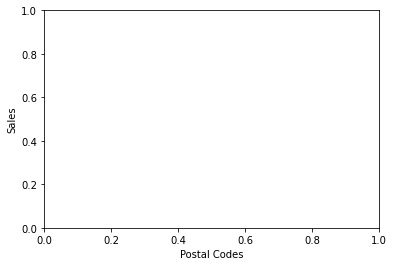

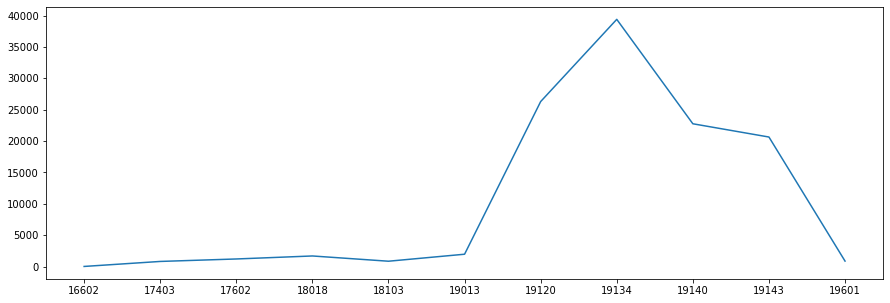

Postal Code
16602       20.451
17403      817.978
17602     1211.395
18018     1689.634
18103      853.252
19013     1968.479
19120    26292.518
19134    39390.293
19140    22752.914
19143    20641.288
19601      873.712
Name: Sales, dtype: float64


ILLINOIS


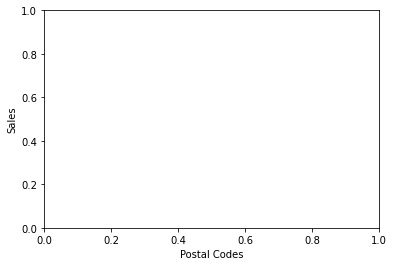

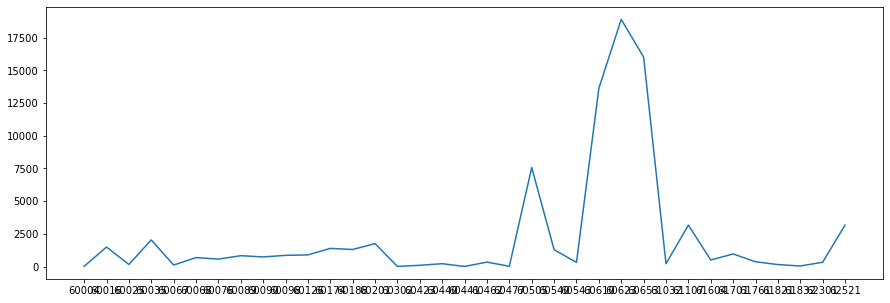

Postal Code
60004       14.112
60016     1493.212
60025      158.376
60035     2035.096
60067      116.312
60068      685.000
60076      568.832
60089      831.399
60090      737.142
60098      857.250
60126      891.628
60174     1388.710
60188     1305.810
60201     1753.799
60302       10.192
60423       97.632
60440      218.308
60441        8.952
60462      339.960
60477       22.288
60505     7572.968
60540     1288.303
60543      321.978
60610    13627.124
60623    18899.911
60653    16012.506
61032      215.820
61107     3166.228
61604      501.480
61701      963.940
61761      366.744
61821      151.960
61832       43.372
62301      330.284
62521     3169.473
Name: Sales, dtype: float64


MINNESOTA


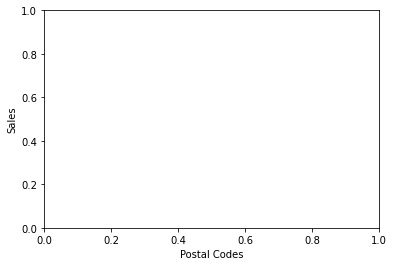

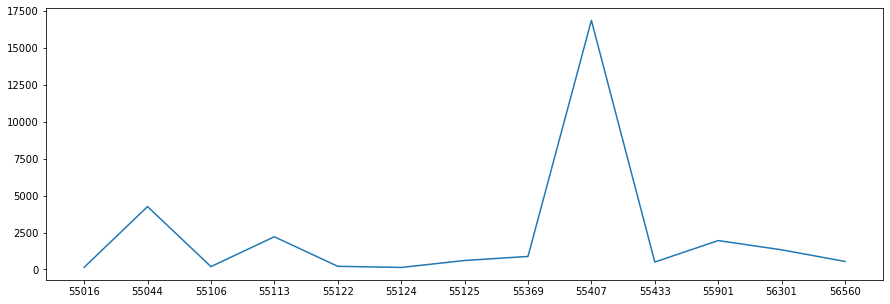

Postal Code
55016      144.36
55044     4260.95
55106      192.83
55113     2215.52
55122      214.28
55124      137.94
55125      607.65
55369      882.87
55407    16870.54
55433      503.13
55901     1957.40
56301     1331.82
56560      543.86
Name: Sales, dtype: float64


MICHIGAN


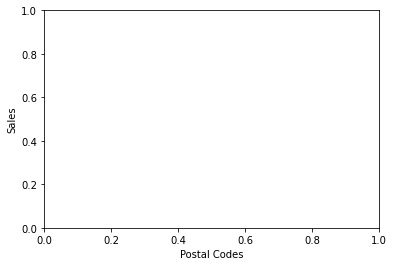

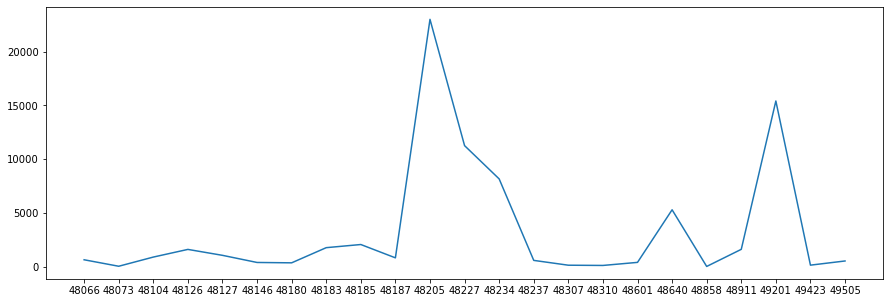

Postal Code
48066      638.330
48073       35.340
48104      889.273
48126     1603.310
48127     1051.570
48146      387.602
48180      353.700
48183     1765.195
48185     2057.976
48187      818.130
48205    23018.732
48227    11262.780
48234     8165.432
48237      580.860
48307      132.520
48310      110.040
48601      395.860
48640     5291.512
48858       17.140
48911     1610.286
49201    15420.036
49423      137.860
49505      526.130
Name: Sales, dtype: float64


DELAWARE


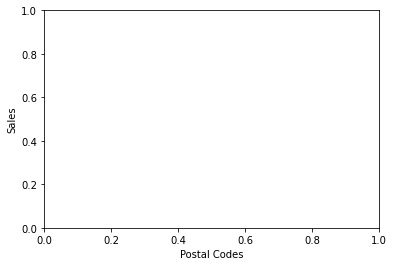

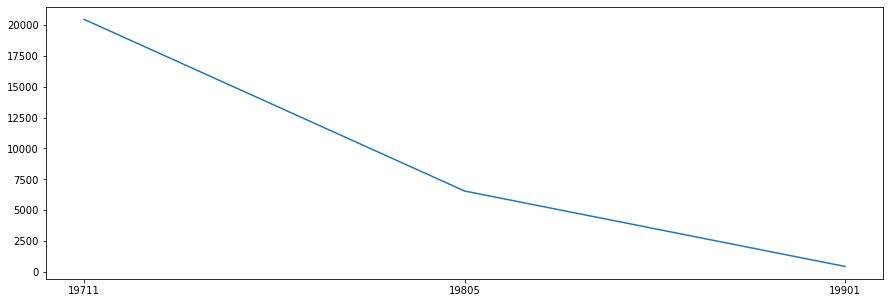

Postal Code
19711    20448.050
19805     6553.899
19901      449.120
Name: Sales, dtype: float64


INDIANA


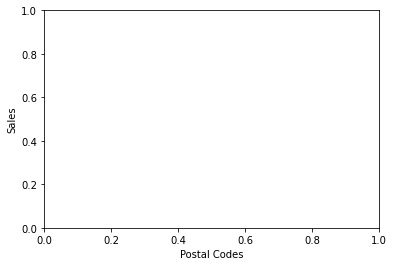

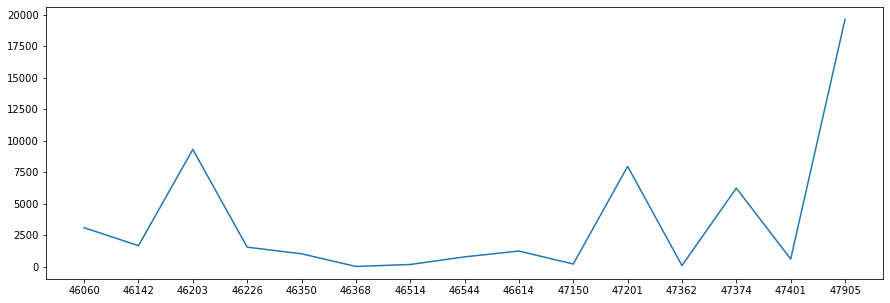

Postal Code
46060     3091.18
46142     1665.05
46203     9306.42
46226     1545.13
46350     1021.34
46368       16.28
46514      171.43
46544      776.24
46614     1238.33
47150      209.55
47201     7960.40
47362       84.61
47374     6235.15
47401      603.80
47905    19630.45
Name: Sales, dtype: float64


NEW YORK


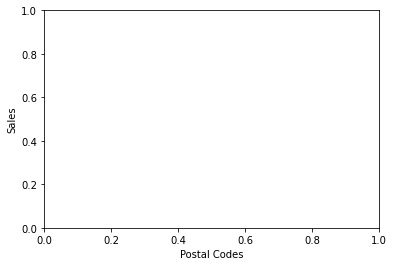

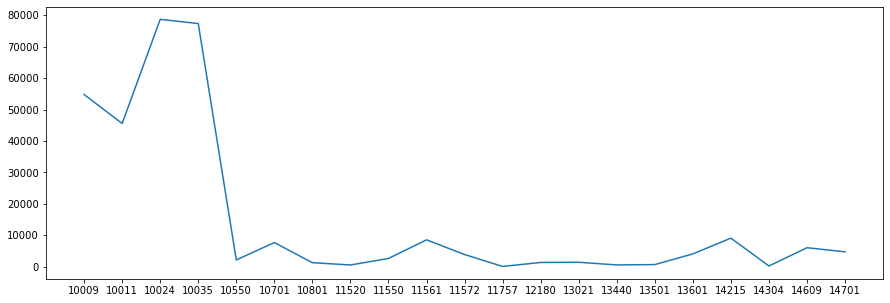

Postal Code
10009    54761.496
10011    45551.598
10024    78697.182
10035    77357.885
10550     2119.632
10701     7657.666
10801     1255.228
11520      523.330
11550     2589.586
11561     8521.200
11572     3851.126
11757       55.480
12180     1326.556
13021     1384.158
13440      534.852
13501      655.040
13601     4044.998
14215     9063.496
14304      199.842
14609     6017.130
14701     4708.790
Name: Sales, dtype: float64


ARIZONA


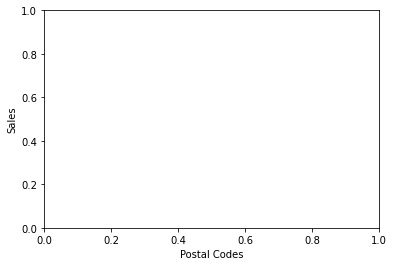

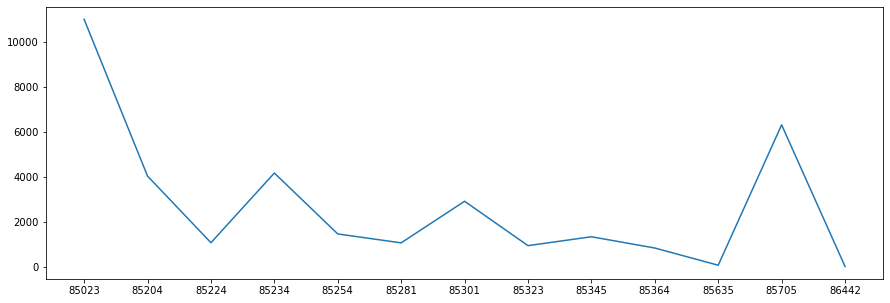

Postal Code
85023    11000.257
85204     4037.740
85224     1076.747
85234     4172.382
85254     1466.307
85281     1070.302
85301     2917.865
85323      946.808
85345     1341.352
85364      840.865
85635       76.072
85705     6313.016
86442       22.288
Name: Sales, dtype: float64


VIRGINIA


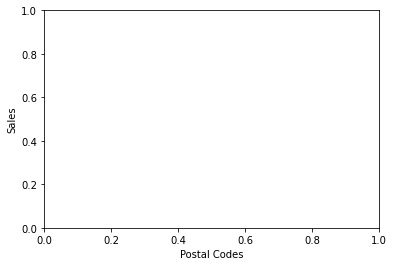

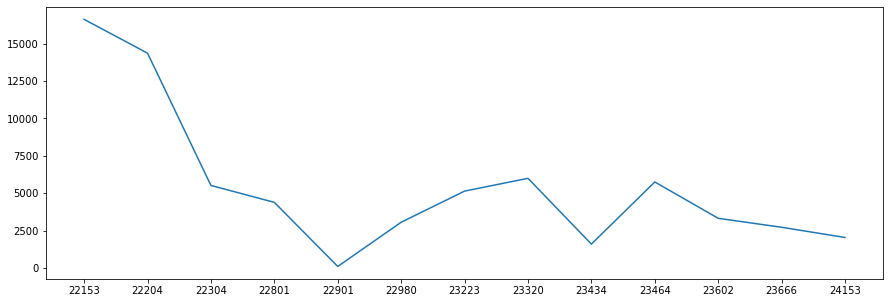

Postal Code
22153    16628.53
22204    14366.76
22304     5519.57
22801     4388.71
22901      102.61
22980     3058.77
23223     5141.26
23320     5996.72
23434     1597.90
23464     5752.13
23602     3321.95
23666     2722.26
24153     2039.55
Name: Sales, dtype: float64


TENNESSEE


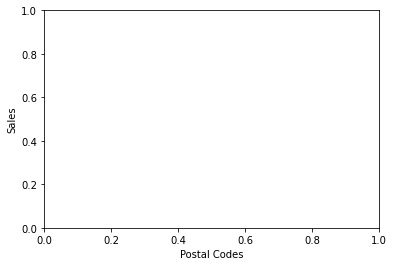

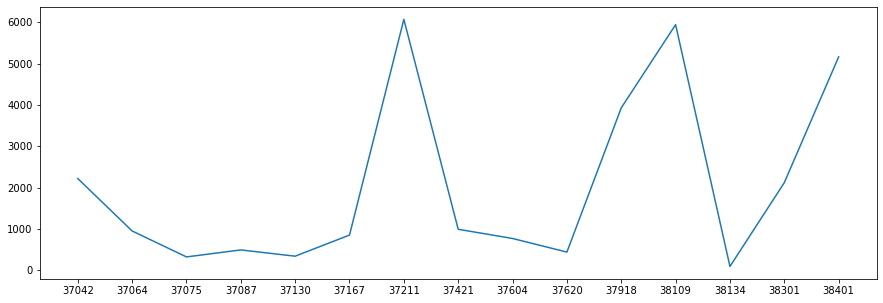

Postal Code
37042    2217.730
37064     948.228
37075     319.538
37087     488.896
37130     337.333
37167     848.579
37211    6070.863
37421     988.803
37604     765.848
37620     436.602
37918    3928.166
38109    5942.341
38134      88.960
38301    2117.212
38401    5162.774
Name: Sales, dtype: float64


ALABAMA


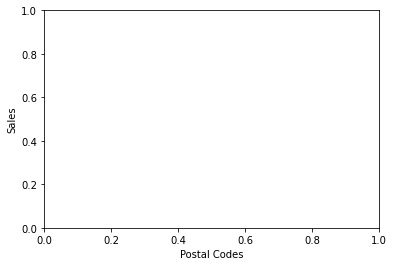

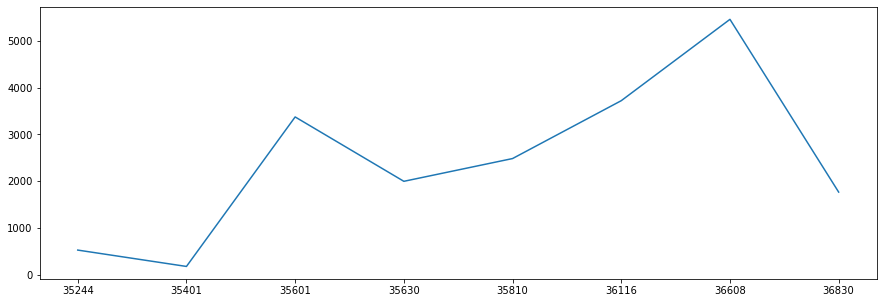

Postal Code
35244     525.85
35401     175.70
35601    3374.82
35630    1997.35
35810    2484.37
36116    3722.73
36608    5462.99
36830    1766.83
Name: Sales, dtype: float64


SOUTH CAROLINA


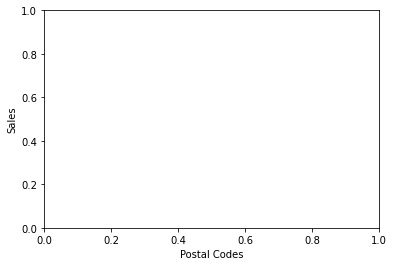

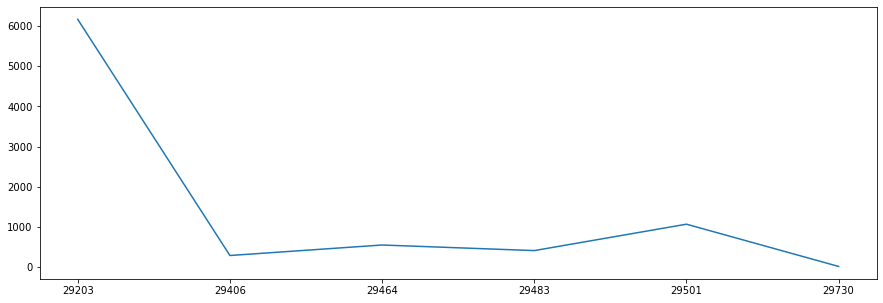

Postal Code
29203    6168.16
29406     284.25
29464     545.94
29483     406.94
29501    1064.57
29730      11.85
Name: Sales, dtype: float64


OREGON


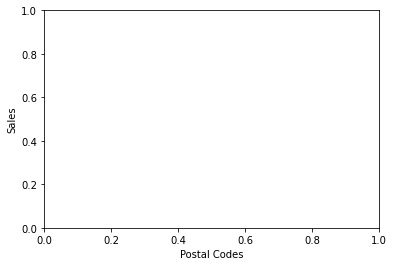

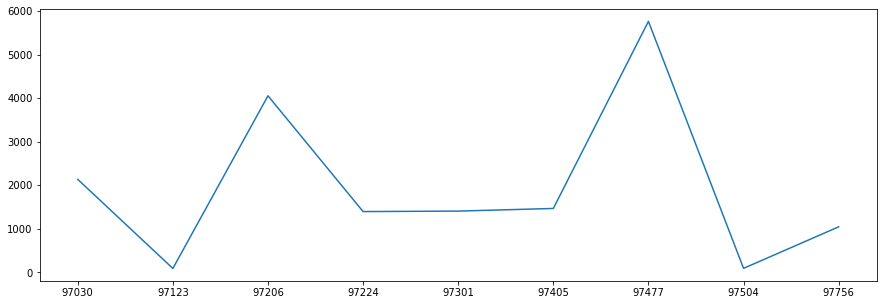

Postal Code
97030    2133.424
97123      87.838
97206    4051.869
97224    1393.782
97301    1404.695
97405    1465.032
97477    5761.265
97504      90.218
97756    1043.027
Name: Sales, dtype: float64


COLORADO


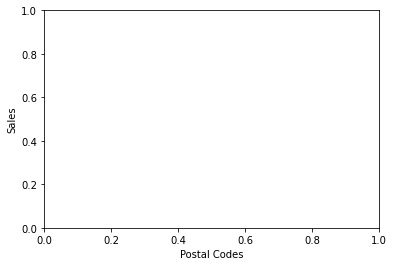

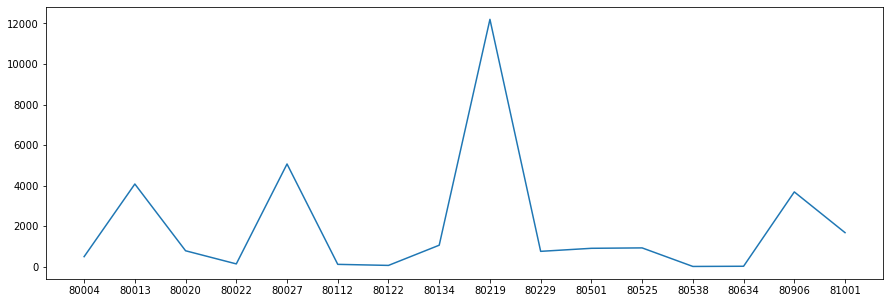

Postal Code
80004      503.400
80013     4083.510
80020      793.504
80022      146.352
80027     5070.416
80112      124.056
80122       72.294
80134     1067.942
80219    12198.793
80229      765.248
80501      915.088
80525      935.252
80538       20.964
80634       30.352
80906     3694.009
81001     1686.938
Name: Sales, dtype: float64


IOWA


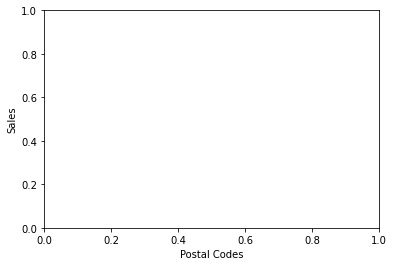

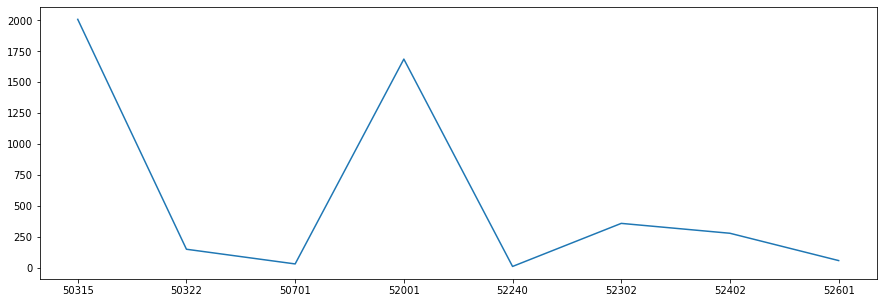

Postal Code
50315    2008.84
50322     149.12
50701      30.32
52001    1687.30
52240       9.99
52302     358.36
52402     278.40
52601      57.43
Name: Sales, dtype: float64


OHIO


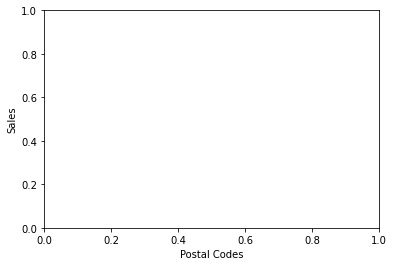

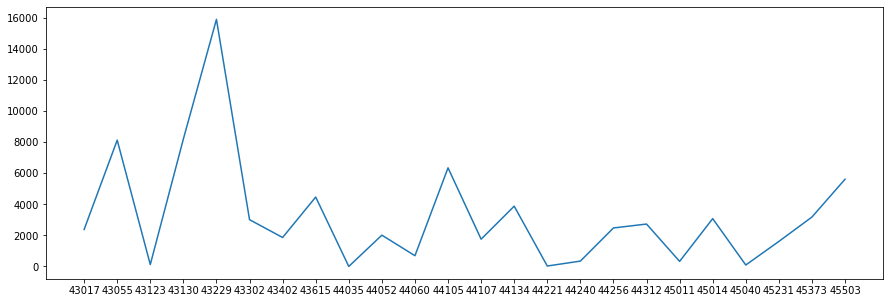

Postal Code
43017     2379.160
43055     8128.069
43123      123.588
43130     8202.625
43229    15900.793
43302     3010.986
43402     1865.565
43615     4466.053
44035        1.824
44052     2015.111
44060      693.130
44105     6346.185
44107     1756.324
44134     3879.756
44221       29.094
44240      346.302
44256     2477.722
44312     2729.986
45011      328.224
45014     3077.697
45040       94.264
45231     1611.976
45373     3180.535
45503     5613.167
Name: Sales, dtype: float64


MISSOURI


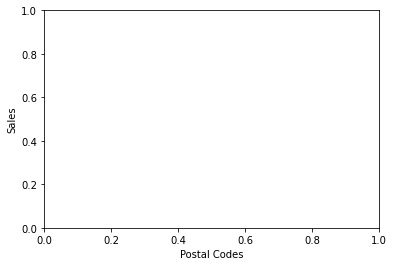

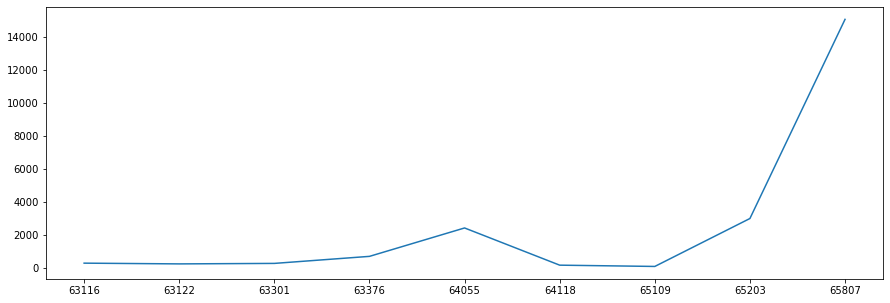

Postal Code
63116      285.96
63122      241.34
63301      270.94
63376      697.16
64055     2417.37
64118      164.34
65109       86.62
65203     2990.04
65807    15051.38
Name: Sales, dtype: float64


OKLAHOMA


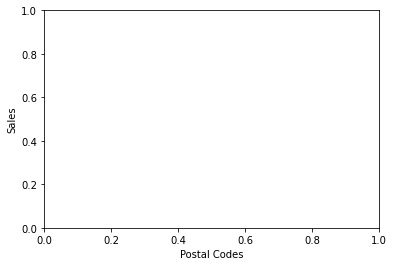

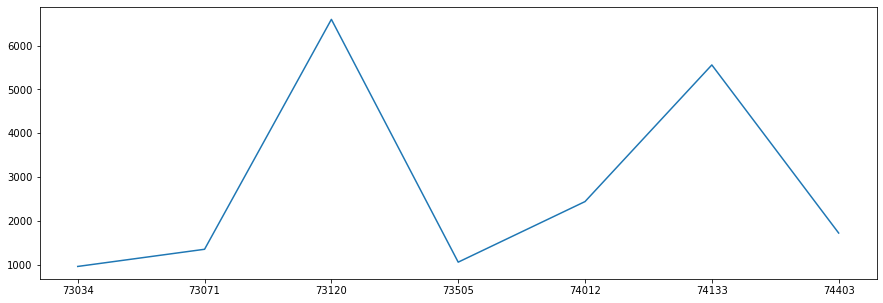

Postal Code
73034     959.55
73071    1351.33
73120    6596.82
73505    1057.49
74012    2439.53
74133    5556.97
74403    1721.70
Name: Sales, dtype: float64


NEW MEXICO


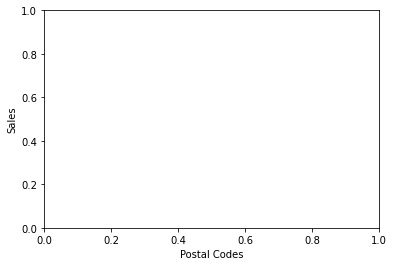

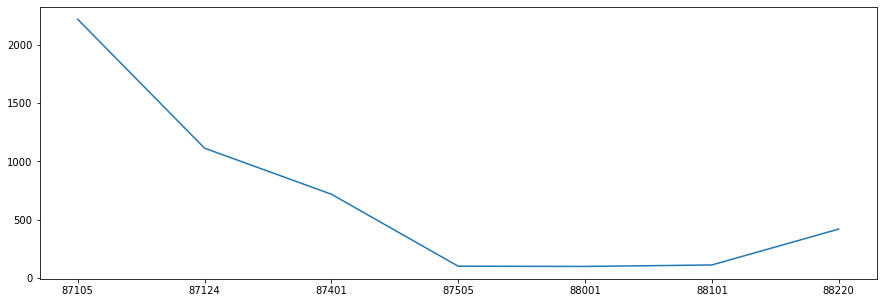

Postal Code
87105    2220.160
87124    1114.192
87401     718.720
87505     100.920
88001      98.770
88101     111.420
88220     419.340
Name: Sales, dtype: float64


LOUISIANA


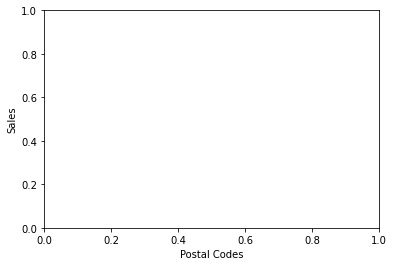

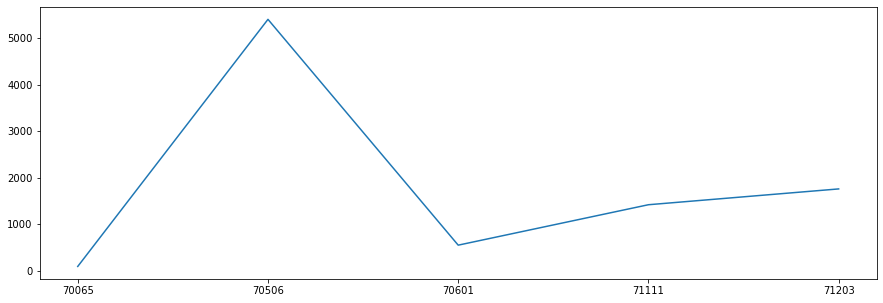

Postal Code
70065      89.32
70506    5405.75
70601     547.41
71111    1417.18
71203    1757.37
Name: Sales, dtype: float64


CONNECTICUT


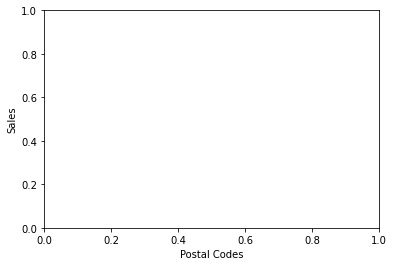

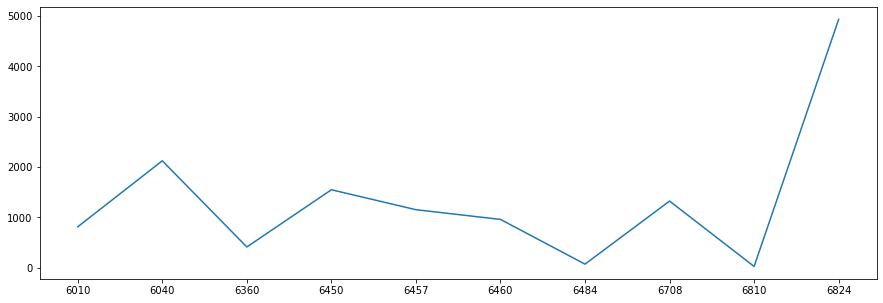

Postal Code
6010     814.580
6040    2126.280
6360     414.040
6450    1550.680
6457    1154.610
6460     961.740
6484      73.330
6708    1326.060
6810      27.460
6824    4935.577
Name: Sales, dtype: float64


NEW JERSEY


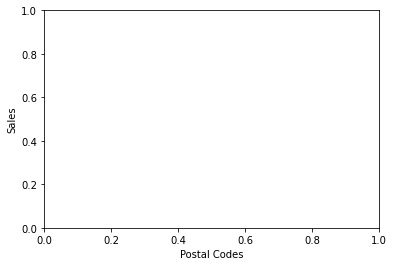

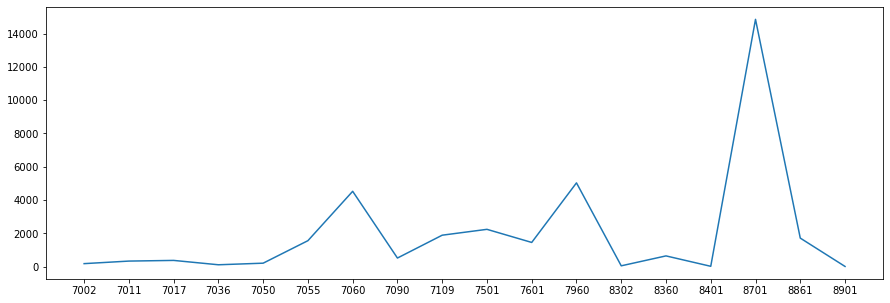

Postal Code
7002      183.400
7011      336.820
7017      377.270
7036      115.360
7050      211.110
7055     1562.086
7060     4526.850
7090      519.720
7109     1891.600
7501     2243.210
7601     1456.160
7960     5033.100
8302       52.410
8360      647.966
8401       23.360
8701    14852.040
8861     1717.080
8901       14.770
Name: Sales, dtype: float64


MASSACHUSETTS


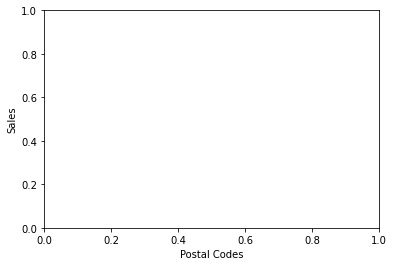

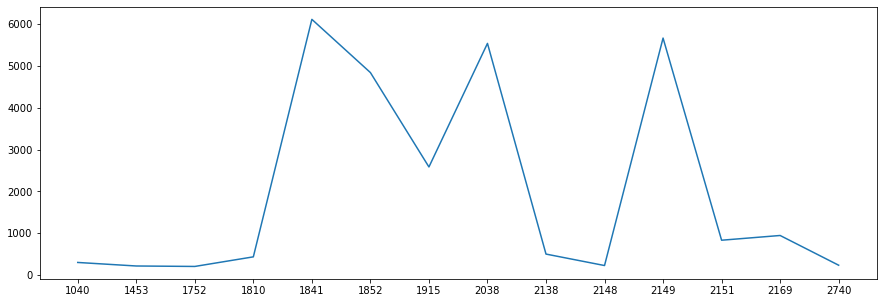

Postal Code
1040     301.960
1453     217.490
1752     206.640
1810     435.850
1841    6109.062
1852    4837.930
1915    2583.190
2038    5534.559
2138     502.090
2148     228.380
2149    5661.878
2151     833.260
2169     946.175
2740     235.970
Name: Sales, dtype: float64


GEORGIA


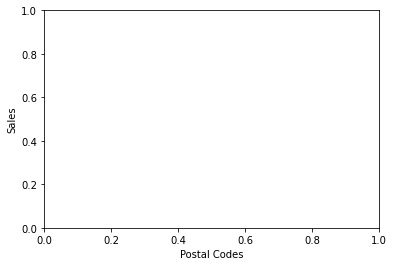

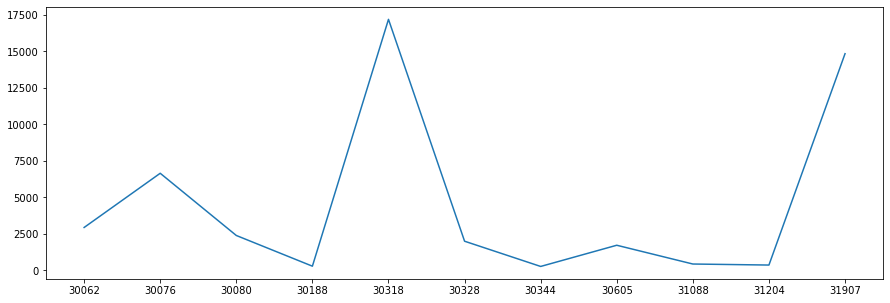

Postal Code
30062     2938.62
30076     6652.32
30080     2390.31
30188      286.65
30318    17197.84
30328     1997.03
30344      268.40
30605     1720.81
31088      434.80
31204      364.01
31907    14845.05
Name: Sales, dtype: float64


NEVADA


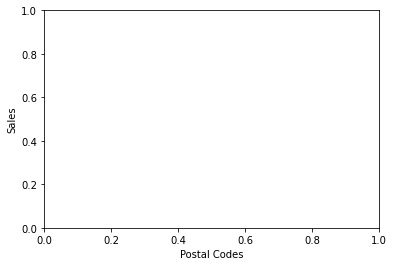

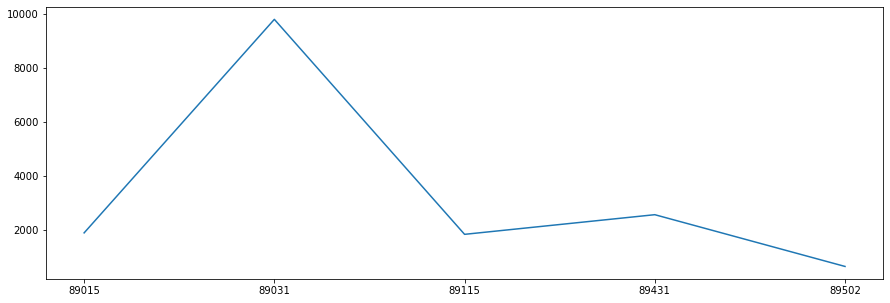

Postal Code
89015    1888.058
89031    9801.002
89115    1834.020
89431    2561.960
89502     644.062
Name: Sales, dtype: float64


RHODE ISLAND


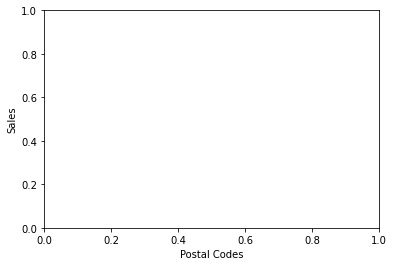

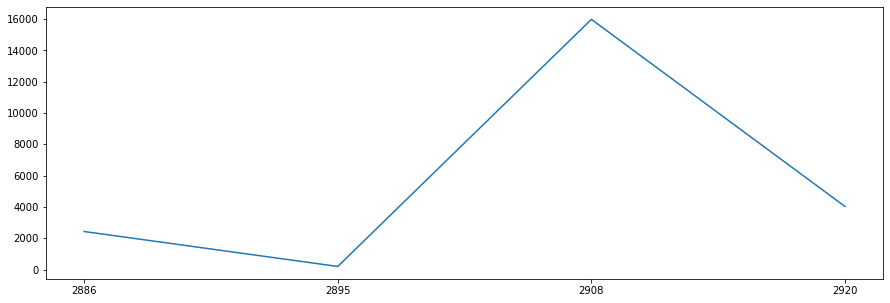

Postal Code
2886     2426.840
2895      195.550
2908    15980.650
2920     4024.916
Name: Sales, dtype: float64


MISSISSIPPI


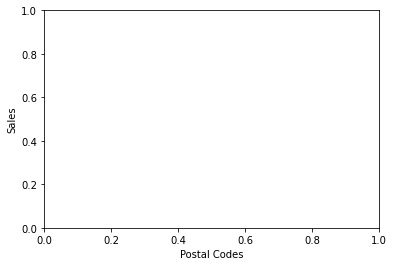

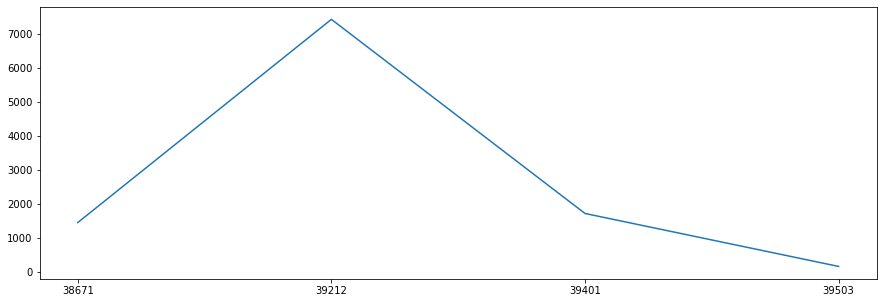

Postal Code
38671    1455.39
39212    7426.61
39401    1722.84
39503     166.50
Name: Sales, dtype: float64


ARKANSAS


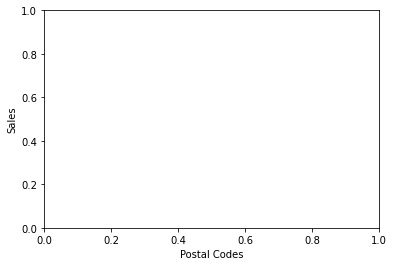

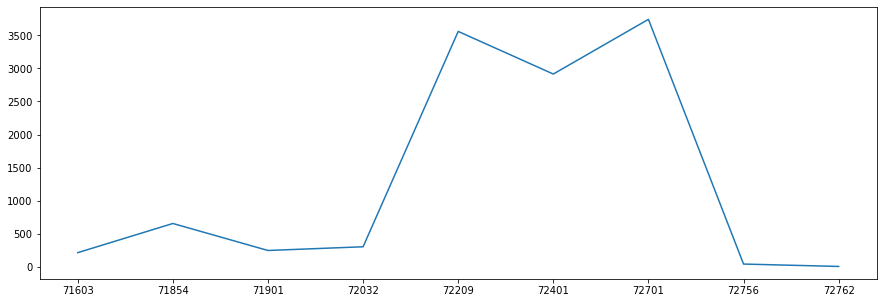

Postal Code
71603     212.91
71854     654.24
71901     245.83
72032     301.96
72209    3560.35
72401    2915.32
72701    3742.81
72756      40.41
72762       4.30
Name: Sales, dtype: float64


MONTANA


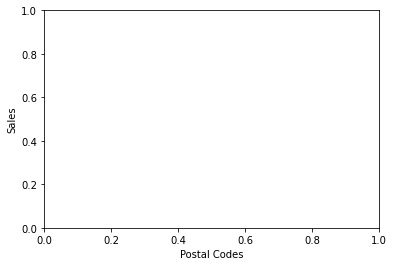

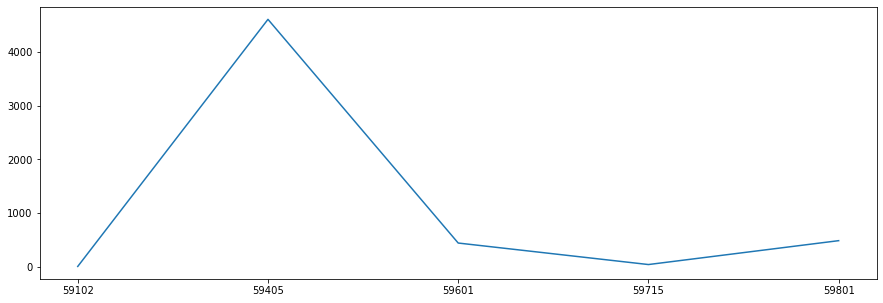

Postal Code
59102       8.288
59405    4605.580
59601     443.840
59715      43.660
59801     487.984
Name: Sales, dtype: float64


NEW HAMPSHIRE


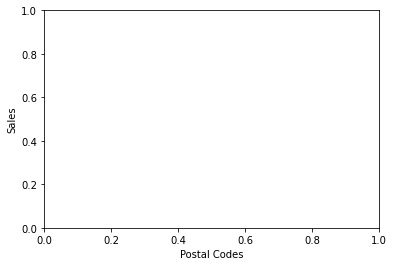

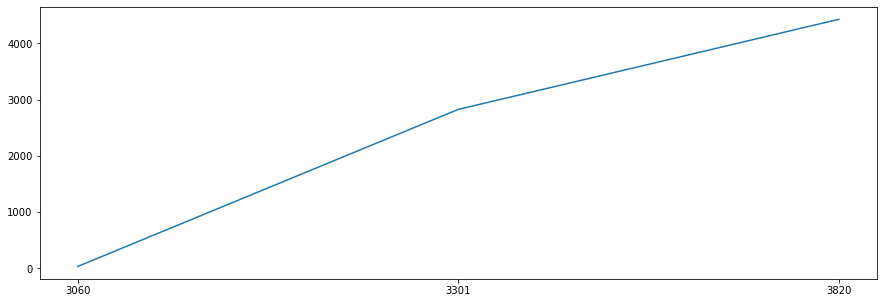

Postal Code
3060      35.940
3301    2827.630
3820    4428.954
Name: Sales, dtype: float64


MARYLAND


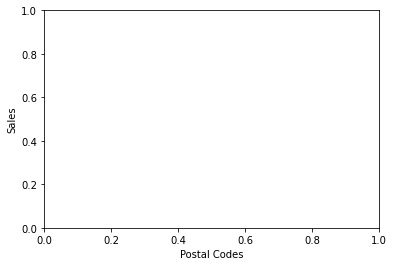

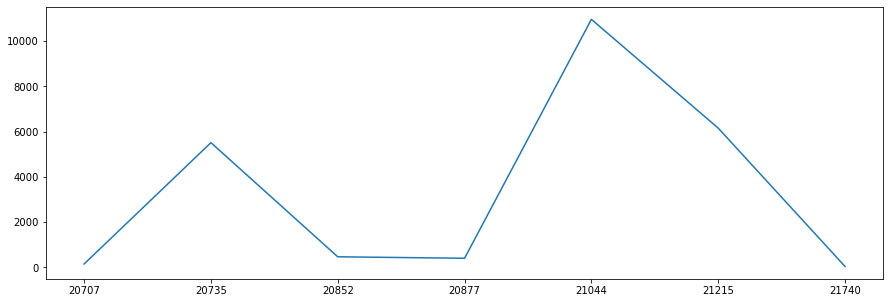

Postal Code
20707      152.590
20735     5514.251
20852      469.770
20877      405.920
21044    10962.350
21215     6156.842
21740       43.800
Name: Sales, dtype: float64


DISTRICT OF COLUMBIA


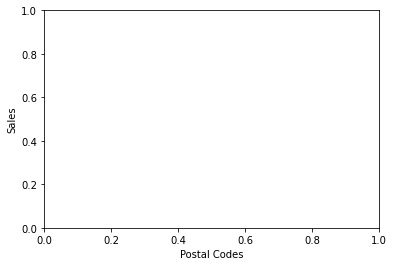

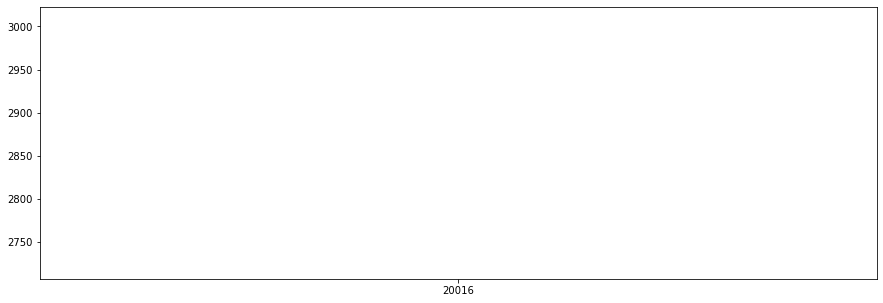

Postal Code
20016    2865.02
Name: Sales, dtype: float64


KANSAS


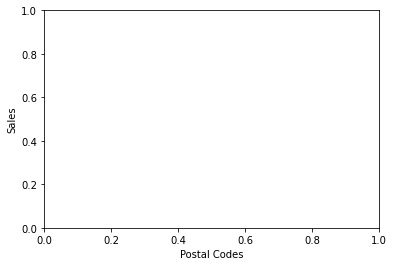

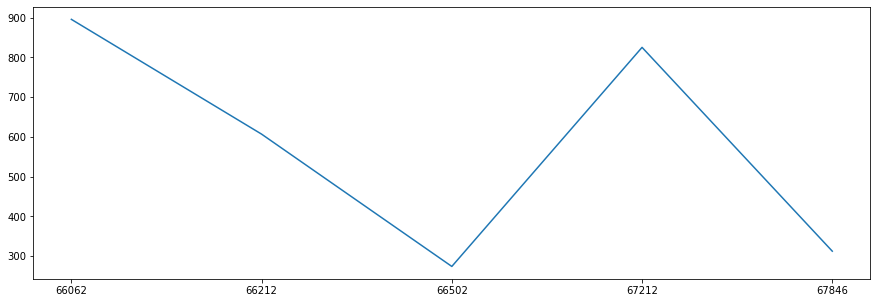

Postal Code
66062    895.79
66212    606.91
66502    273.96
67212    825.27
67846    312.38
Name: Sales, dtype: float64


VERMONT


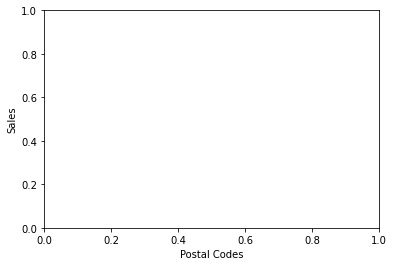

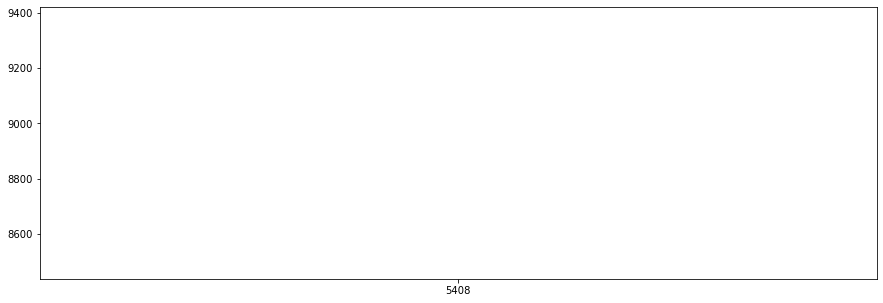

Postal Code
5408    8929.37
Name: Sales, dtype: float64


MAINE


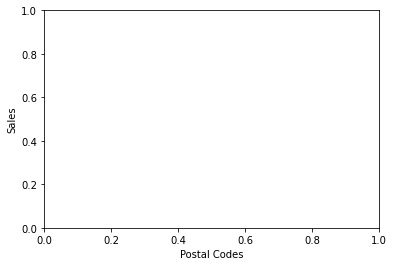

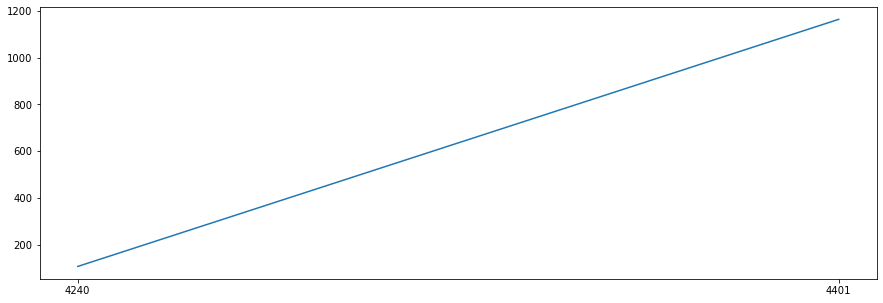

Postal Code
4240     106.08
4401    1164.45
Name: Sales, dtype: float64


SOUTH DAKOTA


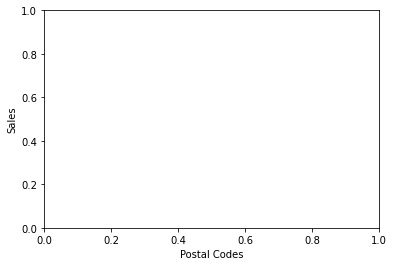

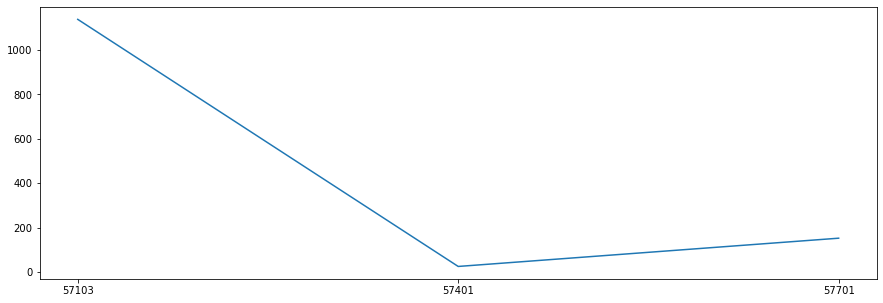

Postal Code
57103    1137.42
57401      25.50
57701     152.64
Name: Sales, dtype: float64


IDAHO


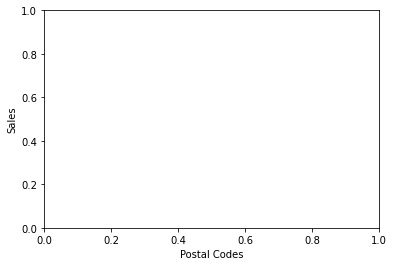

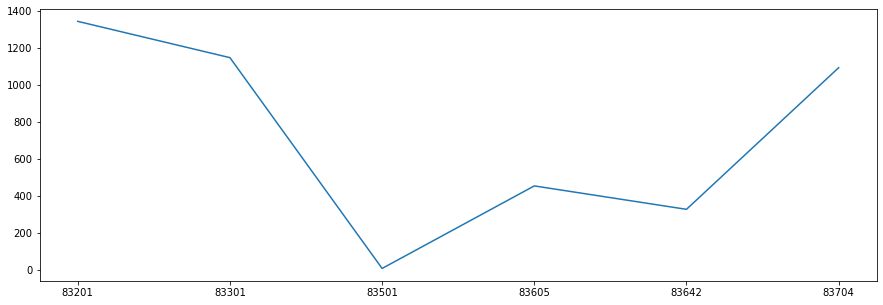

Postal Code
83201    1344.942
83301    1148.806
83501       9.584
83605     455.632
83642     329.052
83704    1094.470
Name: Sales, dtype: float64


NORTH DAKOTA


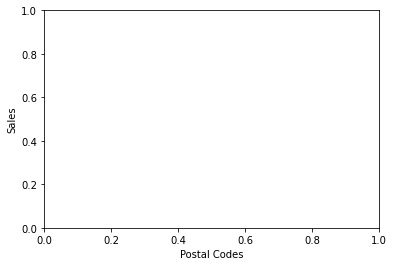

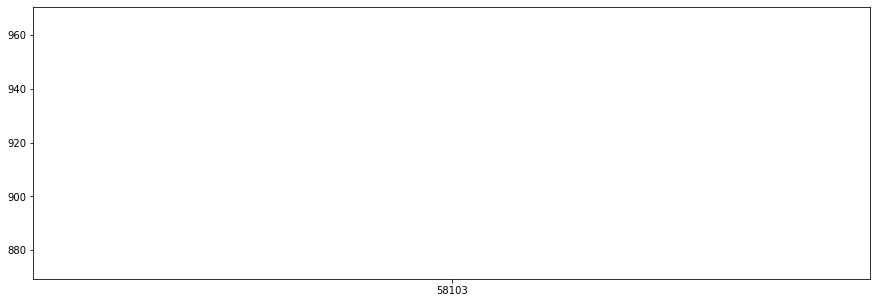

Postal Code
58103    919.91
Name: Sales, dtype: float64


WYOMING


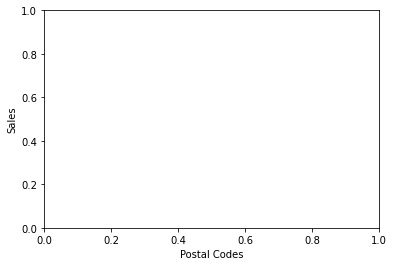

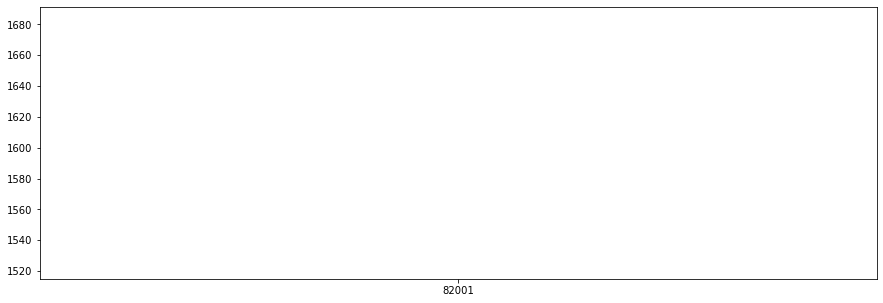

Postal Code
82001    1603.136
Name: Sales, dtype: float64


WEST VIRGINIA


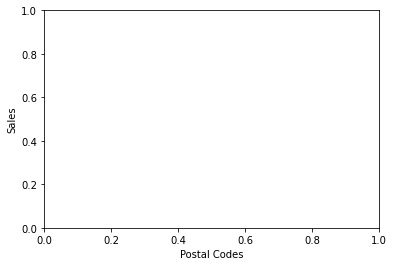

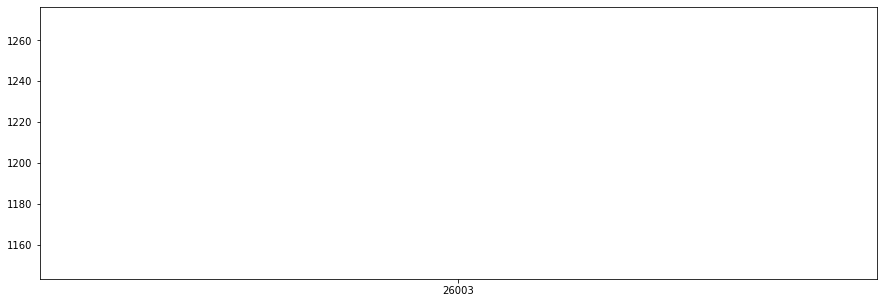

Postal Code
26003    1209.824
Name: Sales, dtype: float64


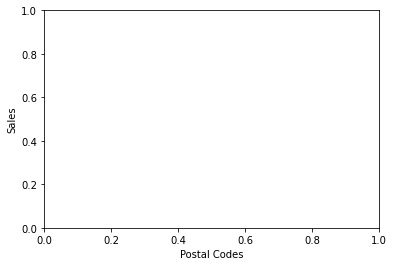

In [32]:
for x in states:
   plotperstate(x)

In [23]:
data.groupby("State")["Postal Code"].unique()

State
Alabama                 [35601, 36116, 35630, 36608, 36830, 35810, 352...
Arizona                 [85234, 85023, 85254, 85705, 85204, 85635, 853...
Arkansas                [72701, 72401, 72209, 71901, 71854, 72756, 720...
California              [90036, 90032, 94109, 90049, 90004, 94122, 956...
Colorado                [80013, 80219, 80906, 80004, 80027, 80134, 810...
Connecticut             [6824, 6040, 6360, 6457, 6450, 6010, 6708, 646...
Delaware                                            [19901, 19805, 19711]
District of Columbia                                              [20016]
Florida                 [33311, 32935, 33614, 33319, 33710, 33024, 331...
Georgia                 [31907, 30318, 31088, 30076, 31204, 30080, 303...
Idaho                          [83642, 83704, 83501, 83201, 83605, 83301]
Illinois                [60540, 60610, 60623, 60462, 61701, 62521, 623...
Indiana                 [47150, 47201, 47374, 46350, 46203, 46614, 473...
Iowa                    [50322, 

In [27]:
a=data[data["State"]== "Washington"]

In [30]:
a.groupby("Postal Code")["Sales"].sum()

Postal Code
98002        4.180
98006      103.622
98026     2523.692
98031     1351.254
98042      413.680
98052       55.230
98059     1242.632
98103    36541.826
98105    41838.008
98115    41160.908
98198     3454.438
98208        3.856
98226     3790.240
98270      102.180
98502     1020.448
98632      119.210
98661      686.836
99207     2027.918
99301     2201.112
Name: Sales, dtype: float64

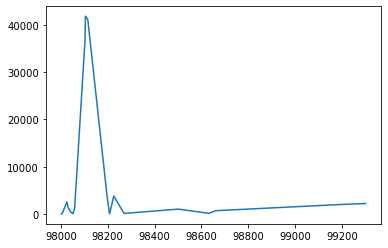

In [31]:
plt.plot(a.groupby("Postal Code")["Sales"].sum())